### Import packages

In [1]:
import matplotlib.pyplot as plt
import math
import pandas as pd
import numpy as np
import copy
from tqdm import tqdm
import time

plt.rcParams.update({'font.size': 22})
plt.ioff()

### Define methods

In [2]:
def isneighbour1d(a,b,L): 
    #gives True, if index a is neighbour of index b
    #using periodic boundary conditions; L is size of the lattice

    if a == b + 1: 
        return True
    elif a == b - 1:
        return True
    elif a == L - 1: #boundary condition
        if b == 0:
            return True
    elif a == 0: #boundary condition
        if b == L-1:
            return True   
    else:
        return False

    
class lattice:
    def __init__(self, L, J=1, B=0, beta=1,start_random = True): #intialize lattice
        self.L = L #LxL is size of lattice
        self.J = J #coupling_constant
        self.B = B #external B field
        self.beta = beta #beta = 1/(Boltzmann constant*T)
        if start_random: # same number spin 1 and -1 at the start
            self.lattice = self.get_random_lattice(L,int(L*L/2))
        else: #all are spin -1
            self.lattice = np.full((L,L),-1, int)
        self.M = self.get_M() #calculate magnetisation
        
        
    def get_random_lattice(self,L,N):
        #lattice size LxL
        #N - number of up spins (1)
        
        #intialize lattice
        lattice = np.full((L,L),-1, int) #fill lattice with -1 Spins
        
        #get indizes of all entries
        c_list = []
        for i in range(L):
            for j in range(L):
                c_list.append((i,j))      
        
        #choose entries which will be 1
        i_list = np.random.choice(list(range(len(c_list))),size = N, replace = False)#choose inizes for entries which will be 1
        
        #change entries to 1
        for i in i_list:
            lattice[c_list[i]] = 1
            
        return lattice
    
    
    def single_flip(self): #consider one entry; see if it flips 
        
        #choose indices of random entry
        i = np.random.randint(0,self.L)
        j = np.random.randint(0,self.L)
        
        #get entries of neighbours
        n_entries = [self.lattice[(i+1)%self.L, j], self.lattice[i, (j+1)%self.L], self.lattice[(i-1)%self.L, j], 
                     self.lattice[i, (j-1)%self.L]]
        #for k in range(lattice.shape[0]):
        #    if isneighbour1d(k,i,L):
        #        for l in range(lattice.shape[0]):
        #            if isneighbour1d(l,j,L):
        #                n_entries.append(lattice[k,l])
        
        #calculate dH
        sum_n_entries = sum(n_entries)
        local_H = self.B*sum_n_entries
        H1 = -self.J * sum_n_entries*self.lattice[i,j] - local_H
        H2 = -self.J * sum_n_entries*-self.lattice[i,j] - local_H 
        dH = H2 - H1

        #if dH <= 0 flip
        if dH <= 0:
            self.lattice[i,j] = -self.lattice[i,j]
        
        #if dH > 0 calculate probability
        else:
            #calculate probability
            p = np.exp(-dH*self.beta)
            #flip a coin and flip spin
            if np.random.random() < p:
                self.lattice[i,j] = -self.lattice[i,j]
        
        self.M = self.get_M() #update magnetization
                
        
    def draw_lattice(self):
        fig = plt.figure()
        plt.imshow(self.lattice, cmap='binary', interpolation='nearest')
        return fig
        
    
    def get_M(self):
        #get magnatisation
        M = sum(sum(self.lattice))
        
        return M
        

In [3]:
class experiment: #doing one experiment/simulation with defined properties
    def __init__(self, L, J=1, B=0, beta=1, number_steps = 1000, draw_lattice_steps = [], start_random = True):
        self.lattice = lattice(L, J = J,  B = B, beta = beta, start_random = start_random)
        self.m_list = np.zeros(number_steps) #mean magnetisation
        self.t = list(range(number_steps))
        self.do_steps(number_steps = number_steps, draw_lattice_steps = draw_lattice_steps)
        self.abs_m_list = np.abs(self.m_list)
    
    def do_steps(self, number_steps = 1000, draw_lattice_steps = 0):
        for i in range(number_steps):
            self.lattice.single_flip()     
            self.m_list[i] = self.lattice.M/self.lattice.L**2
            
            if i in draw_lattice_steps:
                self.lattice.draw_lattice()
                plt.show()
        
        print("2.5")
    

        

## 2) Calculate Autocorrelation
Calculate the autocorrelation function of |M|, for some L, as function of temperature;
observe difference in the Metropolis and Wolff algorithms for this quantity

In [82]:
def autocorrelation(series, lag):
    mean = np.mean(series)
    n = len(series)
    ac = np.sum((series[:n-lag] - mean) * (series[lag:] - mean)) / np.sum((series - mean) ** 2)
    return ac

def plot_ac(series,max_lag,label=""):
    corr_time_reached = False
    ac_list = []
    lag_list = list(range(1,max_lag))
    for lag in lag_list:
        ac_list.append(autocorrelation(series,lag))
        if ac_list[-1] < 1/np.e and corr_time_reached == False:
            corr_time_reached = True
            print(lag)
    plt.plot(lag_list,ac_list,label = label)
    


## autocorrealtion dependence beta for specific lag

  5%|████▏                                                                              | 1/20 [00:24<07:47, 24.61s/it]

2.5


 10%|████████▎                                                                          | 2/20 [00:47<06:59, 23.33s/it]

2.5


 15%|████████████▍                                                                      | 3/20 [01:10<06:38, 23.45s/it]

2.5


 20%|████████████████▌                                                                  | 4/20 [01:32<06:07, 22.95s/it]

2.5


 25%|████████████████████▊                                                              | 5/20 [01:56<05:48, 23.21s/it]

2.5


 30%|████████████████████████▉                                                          | 6/20 [02:24<05:48, 24.89s/it]

2.5


 35%|█████████████████████████████                                                      | 7/20 [02:48<05:19, 24.54s/it]

2.5


 40%|█████████████████████████████████▏                                                 | 8/20 [03:13<04:57, 24.79s/it]

2.5


 45%|█████████████████████████████████████▎                                             | 9/20 [03:38<04:32, 24.75s/it]

2.5


 50%|█████████████████████████████████████████                                         | 10/20 [04:05<04:13, 25.35s/it]

2.5


 55%|█████████████████████████████████████████████                                     | 11/20 [04:31<03:51, 25.72s/it]

2.5


 60%|█████████████████████████████████████████████████▏                                | 12/20 [04:52<03:12, 24.09s/it]

2.5


 65%|█████████████████████████████████████████████████████▎                            | 13/20 [05:14<02:45, 23.71s/it]

2.5


 70%|█████████████████████████████████████████████████████████▍                        | 14/20 [05:40<02:25, 24.21s/it]

2.5


 75%|█████████████████████████████████████████████████████████████▌                    | 15/20 [06:05<02:02, 24.57s/it]

2.5


 80%|█████████████████████████████████████████████████████████████████▌                | 16/20 [06:39<01:49, 27.31s/it]

2.5


 85%|█████████████████████████████████████████████████████████████████████▋            | 17/20 [07:07<01:22, 27.47s/it]

2.5


 90%|█████████████████████████████████████████████████████████████████████████▊        | 18/20 [07:32<00:53, 26.69s/it]

2.5


 95%|█████████████████████████████████████████████████████████████████████████████▉    | 19/20 [07:58<00:26, 26.54s/it]

2.5


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [08:26<00:00, 25.33s/it]

2.5


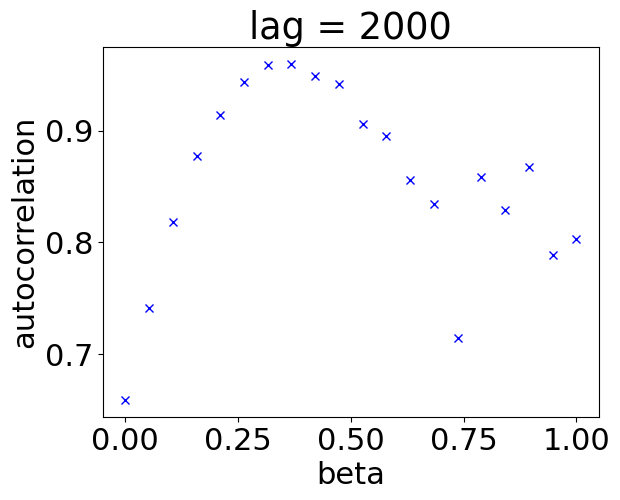

In [77]:
lag = 2000
beta_list = np.linspace(0,1,20)
L = 100

exp_list = []
for beta in tqdm(beta_list):
    exp_list.append(experiment(L,J=1,B=0,beta=beta,number_steps=200000,draw_lattice_steps=[],start_random=False))

plt.figure()
for i in range(len(beta_list)):
    plt.plot(exp_list[i].lattice.beta,autocorrelation(exp_list[i].abs_m_list,lag),'x',color="blue")
    
plt.ylabel("autocorrelation")
plt.xlabel("beta")
plt.title("lag = " + str(lag))
plt.show()

  5%|████▏                                                                              | 1/20 [00:03<01:06,  3.52s/it]

2.5


 10%|████████▎                                                                          | 2/20 [00:07<01:07,  3.78s/it]

2.5


 15%|████████████▍                                                                      | 3/20 [00:12<01:17,  4.57s/it]

2.5


 20%|████████████████▌                                                                  | 4/20 [00:16<01:08,  4.30s/it]

2.5


 25%|████████████████████▊                                                              | 5/20 [00:20<01:00,  4.05s/it]

2.5


 30%|████████████████████████▉                                                          | 6/20 [00:26<01:05,  4.65s/it]

2.5


 35%|█████████████████████████████                                                      | 7/20 [00:29<00:55,  4.31s/it]

2.5


 40%|█████████████████████████████████▏                                                 | 8/20 [00:34<00:51,  4.31s/it]

2.5


 45%|█████████████████████████████████████▎                                             | 9/20 [00:40<00:53,  4.84s/it]

2.5


 50%|█████████████████████████████████████████                                         | 10/20 [00:44<00:45,  4.54s/it]

2.5


 55%|█████████████████████████████████████████████                                     | 11/20 [00:47<00:38,  4.24s/it]

2.5


 60%|█████████████████████████████████████████████████▏                                | 12/20 [00:54<00:39,  4.90s/it]

2.5


 65%|█████████████████████████████████████████████████████▎                            | 13/20 [00:58<00:34,  4.88s/it]

2.5


 70%|█████████████████████████████████████████████████████████▍                        | 14/20 [01:03<00:28,  4.71s/it]

2.5


 75%|█████████████████████████████████████████████████████████████▌                    | 15/20 [01:08<00:23,  4.76s/it]

2.5


 80%|█████████████████████████████████████████████████████████████████▌                | 16/20 [01:12<00:19,  4.77s/it]

2.5


 85%|█████████████████████████████████████████████████████████████████████▋            | 17/20 [01:18<00:14,  4.97s/it]

2.5


 90%|█████████████████████████████████████████████████████████████████████████▊        | 18/20 [01:23<00:09,  4.94s/it]

2.5


 95%|█████████████████████████████████████████████████████████████████████████████▉    | 19/20 [01:29<00:05,  5.42s/it]

2.5


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:34<00:00,  4.72s/it]

2.5


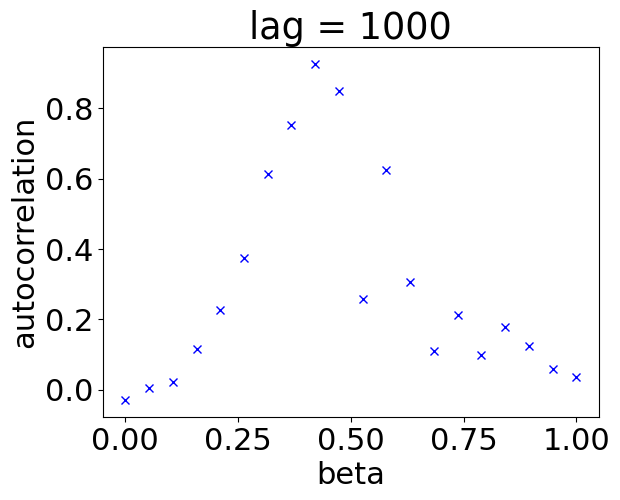

In [94]:
lag = 1000
beta_list = np.linspace(0,1,20)
L = 20

exp_list = []
for beta in tqdm(beta_list):
    exp_list.append(experiment(L,J=1,B=0,beta=beta,number_steps=100000,draw_lattice_steps=[],start_random=False))

plt.figure()
for i in range(len(beta_list)):
    plt.plot(exp_list[i].lattice.beta,autocorrelation(exp_list[i].abs_m_list,lag),'x',color="blue")
    
plt.ylabel("autocorrelation")
plt.xlabel("beta")
plt.title("lag = " + str(lag))
plt.show()

## autocorrelation dependence lag time for different beta

In [83]:
L = 40
beta_list = [0.1,0.2,0.3]
exp_list = []
for beta in tqdm(beta_list):
    exp_list.append(experiment(L,J=1,B=0,beta=beta,number_steps=100000,draw_lattice_steps=[],start_random=False))
    

 33%|████████████████████████████                                                        | 1/3 [00:03<00:07,  3.50s/it]

2.5


 67%|████████████████████████████████████████████████████████                            | 2/3 [00:07<00:03,  3.55s/it]

2.5


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:10<00:00,  3.59s/it]

2.5


  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

1457


 33%|████████████████████████████                                                        | 1/3 [00:05<00:11,  5.59s/it]

3060


 67%|████████████████████████████████████████████████████████                            | 2/3 [00:12<00:06,  6.63s/it]

6530


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:19<00:00,  6.51s/it]


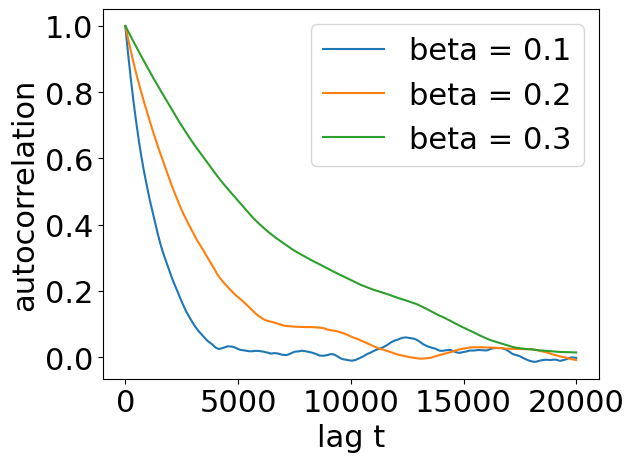

In [84]:
for i in tqdm(range(len(beta_list))):
    plot_ac(exp_list[i].abs_m_list,20000,label = "beta = " + str(exp_list[i].lattice.beta))
    
    
plt.legend()
plt.ylabel("autocorrelation")
plt.xlabel("lag t")
plt.show()

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

1457


 33%|████████████████████████████                                                        | 1/3 [00:01<00:02,  1.44s/it]

3060


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:04<00:00,  1.36s/it]


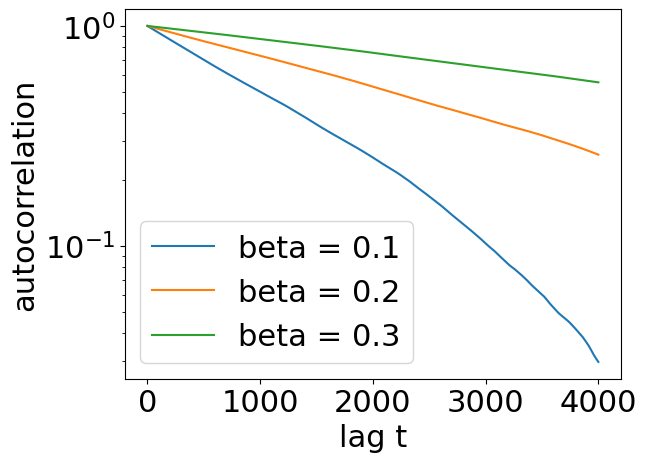

In [86]:
for i in tqdm(range(len(beta_list))):
    plot_ac(exp_list[i].abs_m_list,4000,label = "beta = " + str(exp_list[i].lattice.beta))
    
plt.legend()
plt.ylabel("autocorrelation")
plt.xlabel("lag t")
plt.yscale('log')
#plt.xscale('log')
plt.show()

In [87]:
L = 40
beta_list = [0.5,0.7,0.9]
exp_list = []
for beta in tqdm(beta_list):
    exp_list.append(experiment(L,J=1,B=0,beta=beta,number_steps=100000,draw_lattice_steps=[],start_random=False))
    

 33%|████████████████████████████                                                        | 1/3 [00:04<00:08,  4.40s/it]

2.5


 67%|████████████████████████████████████████████████████████                            | 2/3 [00:08<00:04,  4.50s/it]

2.5


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:13<00:00,  4.56s/it]

2.5


  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

3802


 33%|████████████████████████████                                                        | 1/3 [00:07<00:14,  7.24s/it]

2243


 67%|████████████████████████████████████████████████████████                            | 2/3 [00:14<00:06,  6.97s/it]

2062


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:21<00:00,  7.27s/it]


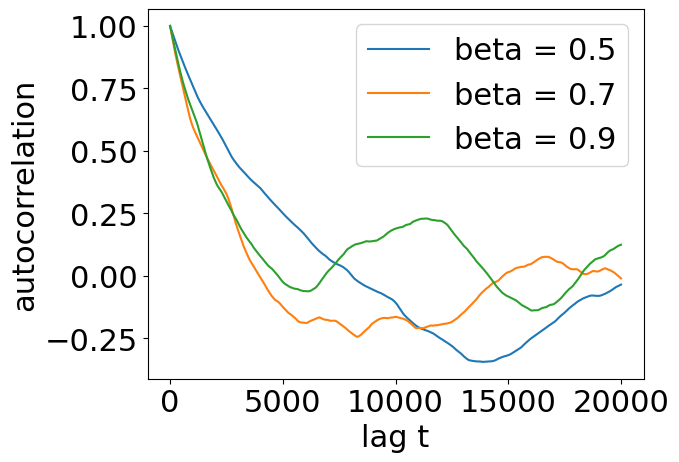

In [88]:
for i in tqdm(range(len(beta_list))):
    plot_ac(exp_list[i].abs_m_list,20000,label = "beta = " + str(exp_list[i].lattice.beta))
    
    
plt.legend()
plt.ylabel("autocorrelation")
plt.xlabel("lag t")
plt.show()

 33%|████████████████████████████                                                        | 1/3 [00:01<00:02,  1.26s/it]

2243


 67%|████████████████████████████████████████████████████████                            | 2/3 [00:02<00:01,  1.22s/it]

2062


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.21s/it]


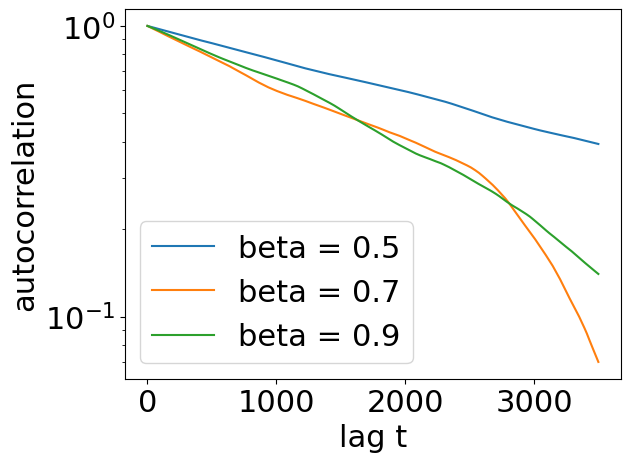

In [91]:
for i in tqdm(range(len(beta_list))):
    plot_ac(exp_list[i].abs_m_list,3500,label = "beta = " + str(exp_list[i].lattice.beta))
    
plt.legend()
plt.ylabel("autocorrelation")
plt.xlabel("lag t")
plt.yscale('log')
#plt.xscale('log')
plt.show()

# 1) time evolution magnetization
Give examples of time evolution of the magnetization M and snapshots of the lattice state
for different temperatures below and above the phase transition

## beta = 0.1

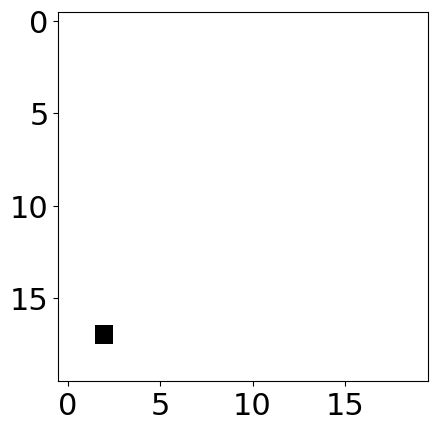

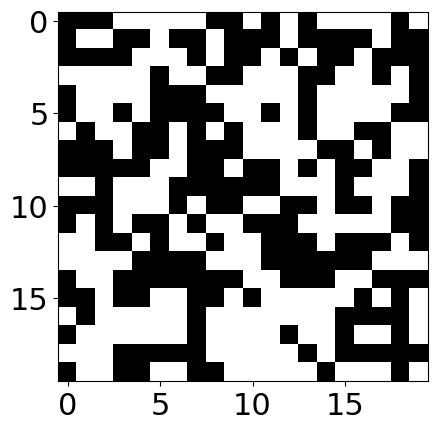

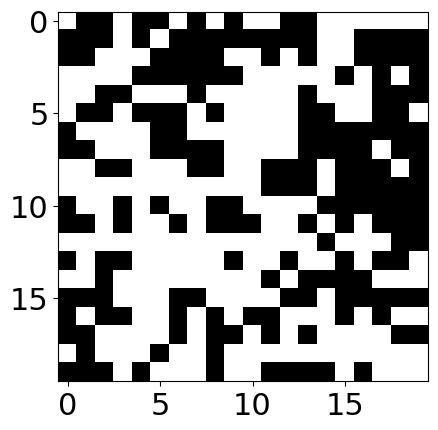

2.5


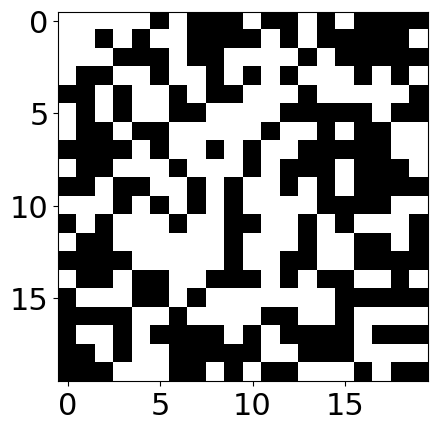

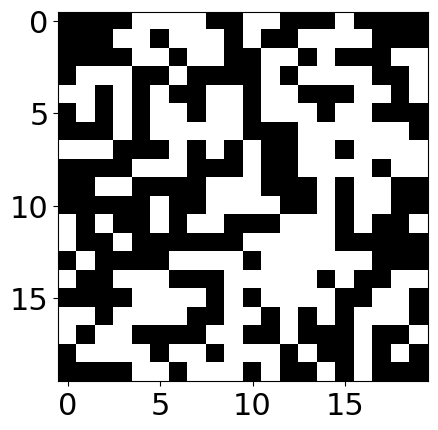

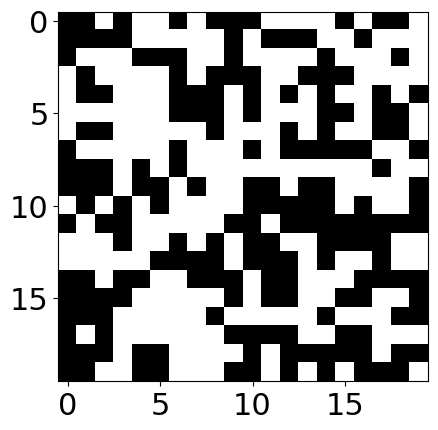

2.5


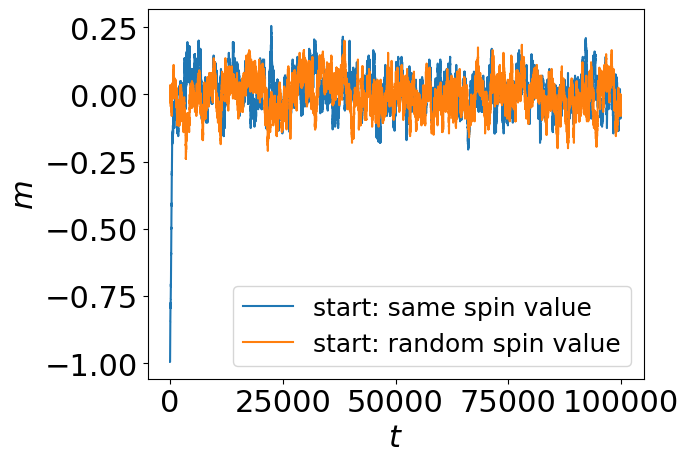

In [7]:
L = 20
n = 100000
beta = 0.1
exp1 = experiment(L,J=1,beta=beta,B=0,number_steps = n,draw_lattice_steps = [0,n/2,n-1],start_random=False)
exp2 = experiment(L,J=1,beta=beta,B=0,number_steps = n,draw_lattice_steps = [0,n/2,n-1],start_random=True)




plt.figure()
plt.xlabel(r'$t$')
plt.ylabel("$m$")
plt.plot(exp1.m_list, label = "start: same spin value")
plt.plot(exp2.m_list, label = "start: random spin value")
plt.legend(fontsize = 18)
plt.show()

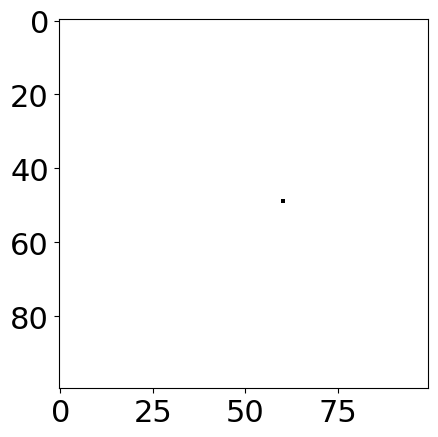

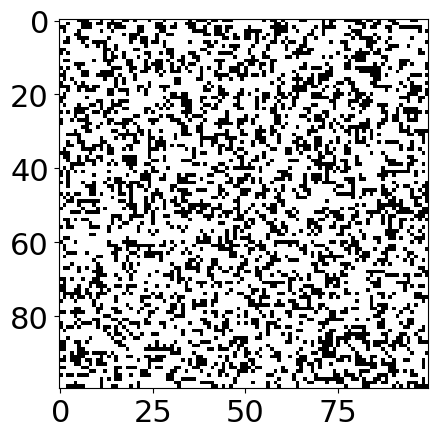

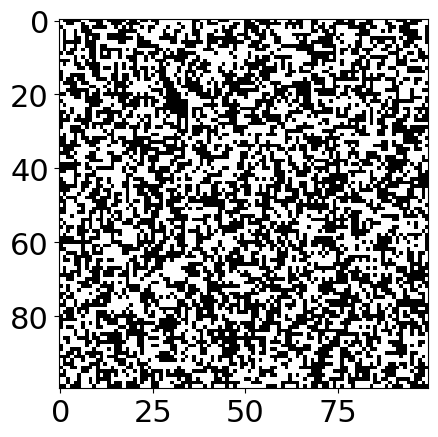

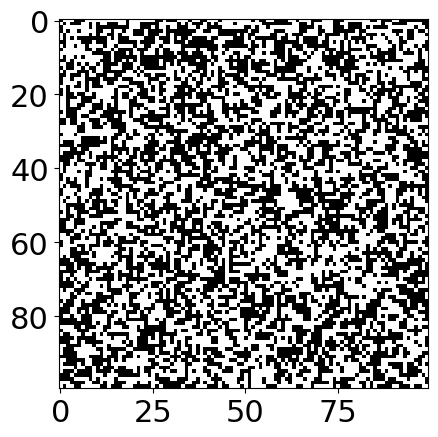

2.5


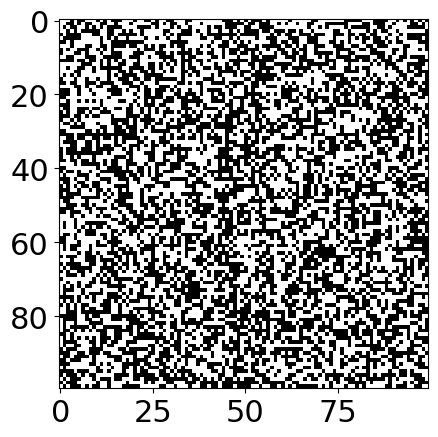

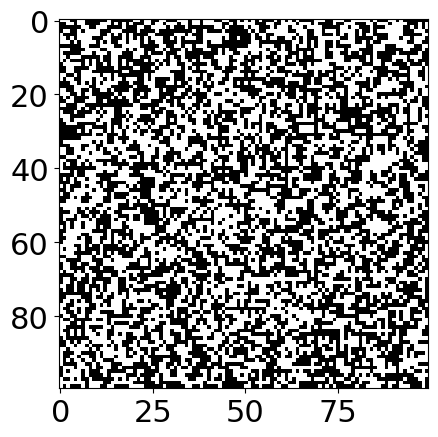

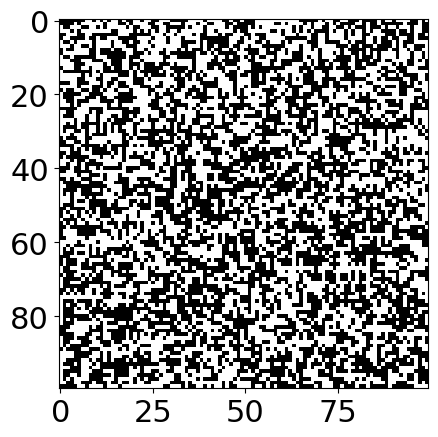

2.5


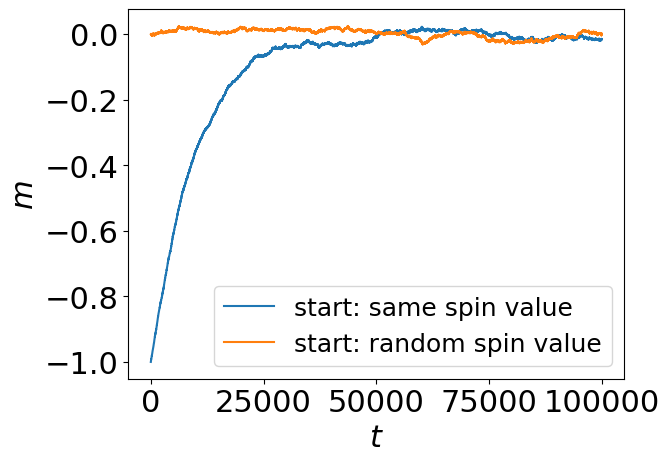

In [14]:
L = 100
n = 100000
beta = 0.1
exp1 = experiment(L,J=1,beta=beta,B=0,number_steps = n,draw_lattice_steps = [0,10000,n/2,n-1],start_random=False)
exp2 = experiment(L,J=1,beta=beta,B=0,number_steps = n,draw_lattice_steps = [0,n/2,n-1],start_random=True)




plt.figure()
plt.xlabel(r'$t$')
plt.ylabel("$m$")
plt.plot(exp1.m_list, label = "start: same spin value")
plt.plot(exp2.m_list, label = "start: random spin value")
plt.legend(fontsize = 18)
plt.show()

## beta = 0.9

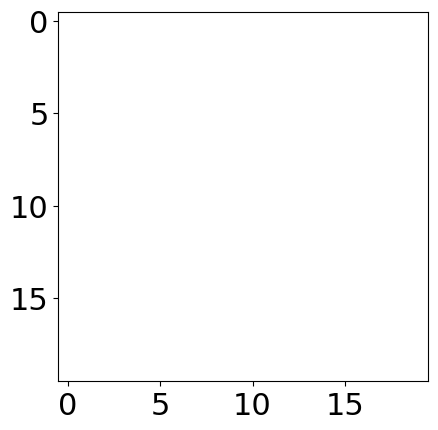

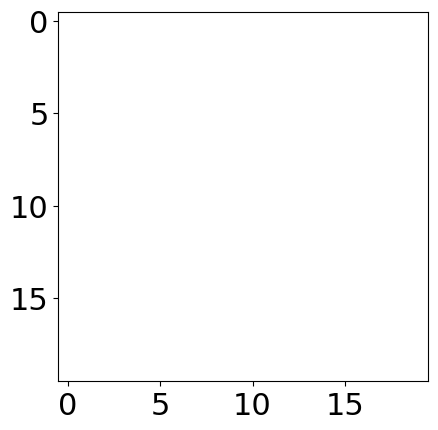

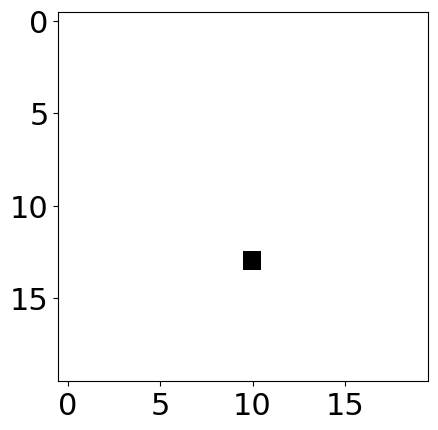

2.5


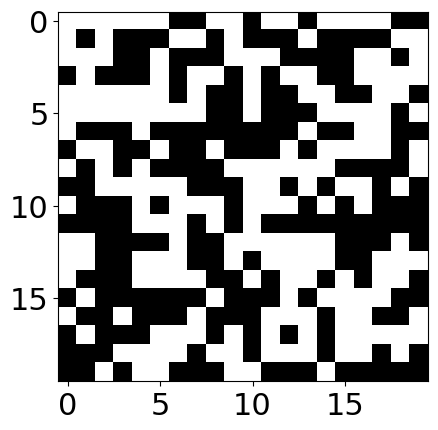

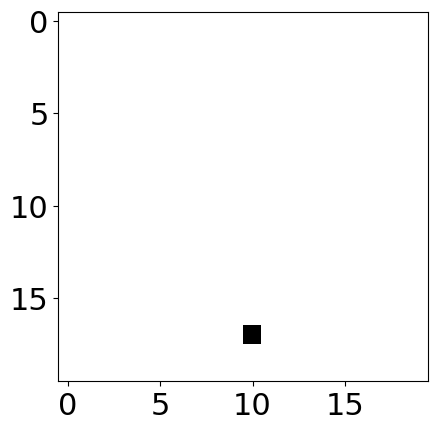

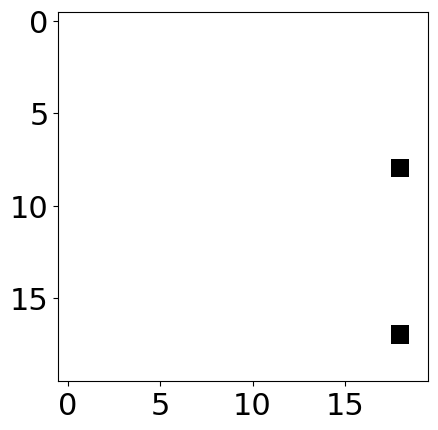

2.5


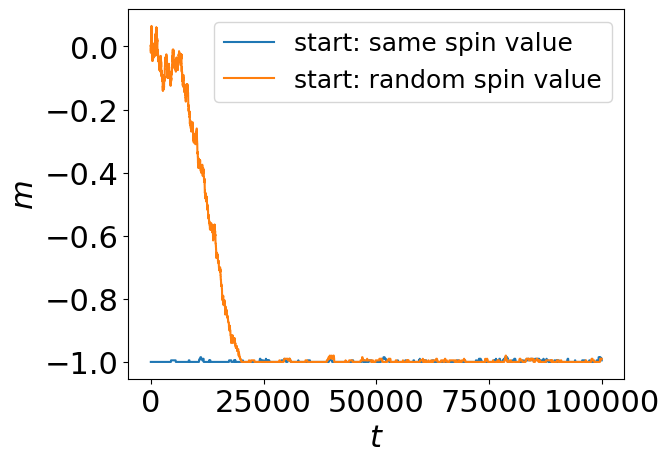

In [9]:
L = 20
n = 100000
beta = 0.9
exp1 = experiment(L,J=1,beta=beta,B=0,number_steps = n,draw_lattice_steps = [0,n/2,n-1],start_random=False)
exp2 = experiment(L,J=1,beta=beta,B=0,number_steps = n,draw_lattice_steps = [0,n/2,n-1],start_random=True)


plt.figure()
plt.xlabel(r'$t$')
plt.ylabel("$m$")
plt.plot(exp1.m_list, label = "start: same spin value")
plt.plot(exp2.m_list, label = "start: random spin value")

plt.legend(fontsize = 18)
plt.show()

# Temperature dependence magnetization, susceptibility
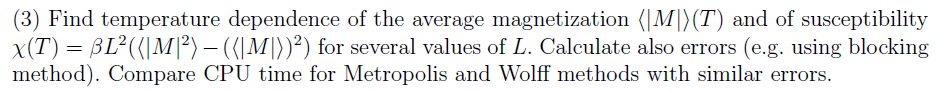

In [128]:
def calculate_susceptibility(magnetization_list, beta, L):
        magnetization_squared_list = np.power(magnetization_list,2)
                       
        susceptibility = beta * L**2 * (np.mean(magnetization_squared_list) - np.mean(magnetization_list)**2)
        return susceptibility
    
def calculate_errors_bootstrapping(m_list, beta, L, num_resamples = 1000):
    #calculating errors of mean_magnetization and susceptibility
    
    magnetizations = []
    susceptibilities = [] 
    for i in range(num_resamples):
        #resample data
        bootstrap_resample = np.random.choice(m_list, size = len(m_list),replace = True)
        
        #calculate susceptibility and mean_magnetization of resamples
        magnetizations.append(np.mean(bootstrap_resample))
        susceptibilities.append(calculate_susceptibility(bootstrap_resample,beta,L))
    
    #calculate mean and errors
    mean_magnetization = np.mean(magnetizations)
    mean_susceptibility = np.mean(susceptibilities)
    std_magnetization = np.std(magnetizations)
    std_susceptibility = np.std(susceptibilities)
    
    return mean_magnetization, mean_susceptibility, std_magnetization, std_susceptibility
    
class experiments: #doing several experiments to calculate statistical results 
    def __init__(self,L,J=1,B=0,beta=1,number_steps = 1000, start_random = True, number_experiments = 10, number_bootstrapping_resamples = 1000):
        self.L = L
        self.J = J
        self.B = B
        self.beta = beta
        self.number_steps = number_steps
        self.start_random = start_random
        self.number_experiments = number_experiments
        self.number_bootstrapping_resamples = number_bootstrapping_resamples
        
        
        self.exp_list = []
        self.magnetization_list = []
        for i in tqdm(range(0,number_experiments)): #doing experiments
            self.exp_list.append(experiment(L,J=J, B=B, beta=beta, number_steps = number_steps, draw_lattice_steps = [], start_random = start_random))
            self.magnetization_list.append(self.exp_list[-1].abs_m_list[-1])
                                 
        self.mean_magnetization, self.susceptibility, self.std_mean_magnetization, self.std_susceptibility = calculate_errors_bootstrapping(self.magnetization_list, self.beta, self.L, num_resamples = self.number_bootstrapping_resamples)
        

### L=20

In [16]:
L = 20
number_steps = 100000
beta_list = np.linspace(0.05,0.95,20)

#calculate data and save it in lists
mean_magnetization_list = []
std_m_m_l = []
sus_list = []
std_sus_l = []
for beta in beta_list:
    exps = experiments(L,J=1,B=0,beta=beta,number_steps=number_steps,start_random=False,number_experiments=30, number_bootstrapping_resamples = 1000)
    mean_magnetization_list.append(exps.mean_magnetization)
    std_m_m_l.append(exps.std_mean_magnetization)
    sus_list.append(exps.susceptibility)
    std_sus_l.append(exps.std_susceptibility)

#save data as csv
df = pd.DataFrame()
df.insert(len(df.columns), "beta_list", beta_list, True)
df.insert(len(df.columns), "mean_magnetization_list", mean_magnetization_list, True)
df.insert(len(df.columns), "std_m_m_list", std_m_m_l, True)
df.insert(len(df.columns), "sus_list", sus_list, True)
df.insert(len(df.columns), "std_sus_list", std_sus_l, True)
df.to_csv("ising_data_df_L" + str(L) + "_numbersteps" + str(number_steps) + "_numbetas" + str(len(beta_list))+".csv")

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [01:32<00:00,  3.08s/it]


### L=60

In [17]:
L = 60
number_steps = 100000
beta_list = np.linspace(0.05,0.95,20)

#calculate data and save it in lists
mean_magnetization_list = []
std_m_m_l = []
sus_list = []
std_sus_l = []
for beta in beta_list:
    exps = experiments(L,J=1,B=0,beta=beta,number_steps=number_steps,start_random=False,number_experiments=30, number_bootstrapping_resamples = 1000)
    mean_magnetization_list.append(exps.mean_magnetization)
    std_m_m_l.append(exps.std_mean_magnetization)
    sus_list.append(exps.susceptibility)
    std_sus_l.append(exps.std_susceptibility)

#save data as csv
df = pd.DataFrame()
df.insert(len(df.columns), "beta_list", beta_list, True)
df.insert(len(df.columns), "mean_magnetization_list", mean_magnetization_list, True)
df.insert(len(df.columns), "std_m_m_list", std_m_m_l, True)
df.insert(len(df.columns), "sus_list", sus_list, True)
df.insert(len(df.columns), "std_sus_list", std_sus_l, True)
df.to_csv("ising_data_df_L" + str(L) + "_numbersteps" + str(number_steps) + "_numbetas" + str(len(beta_list))+".csv")

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [02:56<00:00,  5.90s/it]


### L = 100

In [18]:
L = 100
number_steps = 100000
beta_list = np.linspace(0.05,0.95,20)

#calculate data and save it in lists
mean_magnetization_list = []
std_m_m_l = []
sus_list = []
std_sus_l = []
for beta in beta_list:
    exps = experiments(L,J=1,B=0,beta=beta,number_steps=number_steps,start_random=False,number_experiments=30, number_bootstrapping_resamples = 1000)
    mean_magnetization_list.append(exps.mean_magnetization)
    std_m_m_l.append(exps.std_mean_magnetization)
    sus_list.append(exps.susceptibility)
    std_sus_l.append(exps.std_susceptibility)

#save data as csv
df = pd.DataFrame()
df.insert(len(df.columns), "beta_list", beta_list, True)
df.insert(len(df.columns), "mean_magnetization_list", mean_magnetization_list, True)
df.insert(len(df.columns), "std_m_m_list", std_m_m_l, True)
df.insert(len(df.columns), "sus_list", sus_list, True)
df.insert(len(df.columns), "std_sus_list", std_sus_l, True)
df.to_csv("ising_data_df_L" + str(L) + "_numbersteps" + str(number_steps) + "_numbetas" + str(len(beta_list))+".csv")

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [04:36<00:00,  9.22s/it]


### Plots

In [139]:
df_20 = pd.read_csv("ising_data_df_L20_numbersteps100000_numbetas20.csv")
df_60 = pd.read_csv("ising_data_df_L60_numbersteps100000_numbetas20.csv")
df_100 = pd.read_csv("ising_data_df_L100_numbersteps100000_numbetas20.csv")

In [140]:
df_20

,Unnamed: 0,beta_list,mean_magnetization_list,std_m_m_list,sus_list,std_sus_list
0,0,0.050000,0.044398,0.005516,0.017943,0.003366
1,1,0.097368,0.062816,0.008307,0.081067,0.014592
2,2,0.144737,0.046723,0.005197,0.045621,0.008952
3,3,0.192105,0.059334,0.009329,0.196385,0.055429
4,4,0.239474,0.088592,0.011083,0.359491,0.058826
5,5,0.286842,0.101554,0.016404,0.852384,0.233606
6,6,0.334211,0.099509,0.013652,0.691813,0.146183
7,7,0.381579,0.232066,0.026642,3.205875,0.784486
8,8,0.428947,0.542900,0.048621,11.361898,2.086059
9,9,0.476316,0.878490,0.008940,0.429177,0.184621


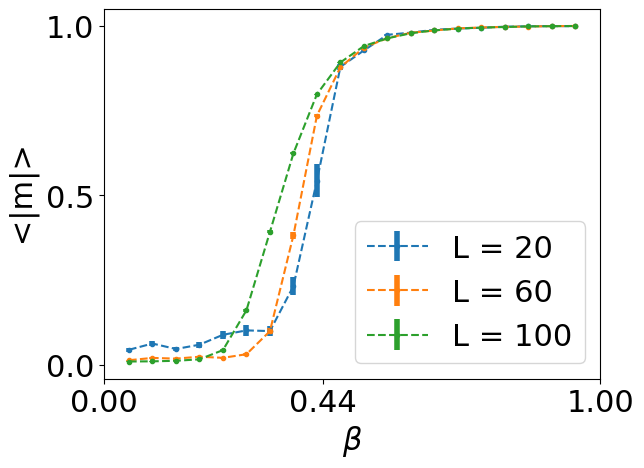

In [141]:
plt.figure()
plt.errorbar(df_20.beta_list,df_20.mean_magnetization_list, yerr = df_20.std_m_m_list,elinewidth = 4,linestyle="--",marker=".", label="L = 20")
plt.errorbar(df_60.beta_list,df_60.mean_magnetization_list, yerr = df_60.std_m_m_list,elinewidth = 4,linestyle="--",marker=".", label="L = 60")
plt.errorbar(df_100.beta_list,df_100.mean_magnetization_list, yerr = df_100.std_m_m_list,elinewidth = 4,linestyle="--",marker=".", label="L = 100")
plt.xticks([0,0.4407,1])
plt.yticks([0,0.5,1])
plt.xlabel(r'$ \beta $')
plt.ylabel(r' <|m|> ')
plt.legend()
plt.show()

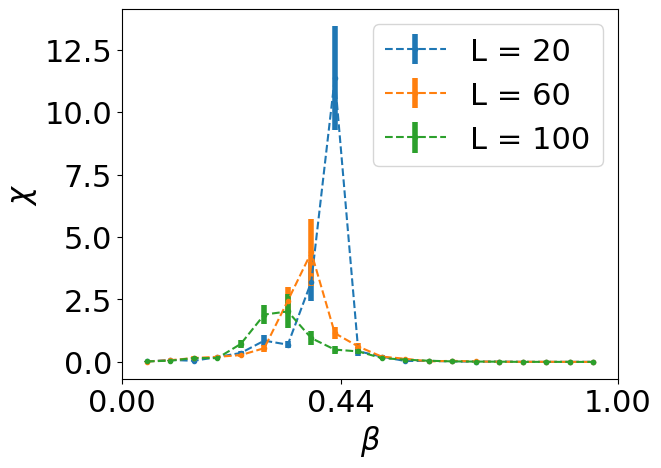

In [142]:
plt.figure()
plt.errorbar(df_20.beta_list,df_20.sus_list, yerr = df_20.std_sus_list,elinewidth = 4,linestyle="--",marker=".", label="L = 20")
plt.errorbar(df_60.beta_list,df_60.sus_list, yerr = df_60.std_sus_list,elinewidth = 4,linestyle="--",marker=".", label="L = 60")
plt.errorbar(df_100.beta_list,df_100.sus_list, yerr = df_100.std_sus_list,elinewidth = 4,linestyle="--",marker=".", label="L = 100")
plt.xlabel(r'$ \beta $')
plt.ylabel(r'$ \chi $')
plt.xticks([0,0.4407,1])
plt.legend()
plt.show()

# Finite size scaling
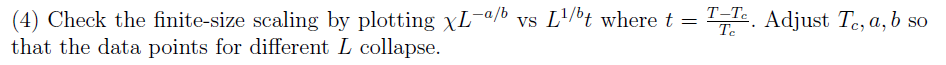

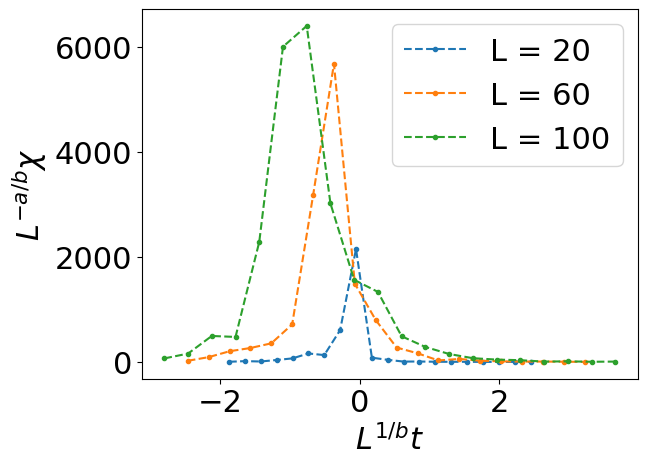

In [172]:
y1 = df_20.sus_list * 20 **(7/4)
y2 = df_60.sus_list * 60 **(7/4)
y3 = df_100.sus_list * 100 **(7/4)

#x1 = ((1/df_20.beta_list - 2.269)/2.269) * 20**(1/4)
#x2 = ((1/df_60.beta_list - 2.269)/2.269) * 60**(1/4)
#x3 = ((1/df_100.beta_list - 2.269)/2.269) * 100**(1/4)
x1 = ((df_20.beta_list - 0.44)/0.44) * 20**(1/4)
x2 = ((df_60.beta_list - 0.44)/0.44) * 60**(1/4)
x3 = ((df_100.beta_list - 0.44)/0.44) * 100**(1/4)



plt.figure()
plt.plot(x1,y1,linestyle="--",marker=".", label="L = 20")
plt.plot(x2,y2,linestyle="--",marker=".", label="L = 60")
plt.plot(x3,y3,linestyle="--",marker=".", label="L = 100")
#plt.xlim([-30,30])
plt.xlabel('$L^{1/b}t$')
plt.ylabel('$L^{-a/b}\chi$')
plt.legend()